### Task 4 : Sales Prediction using Python

Importing required modules

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Loading data

In [2]:
dataset = pd.read_csv("advertising.csv")
data = dataset.copy()

Data inspection

In [3]:
data.head(4)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Data summary statistics

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Pre-processing EDA

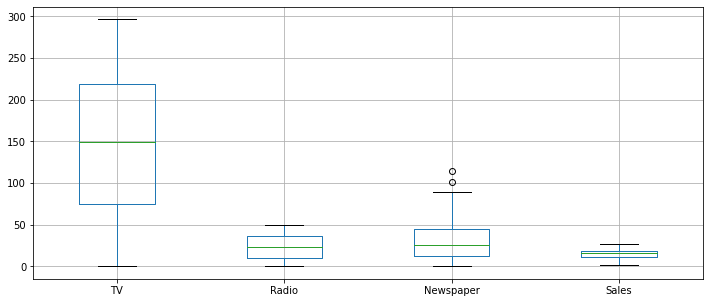

In [6]:
plt.figure(figsize=(12,5))
data.boxplot()
plt.show()

Data pre-processing 

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


- Scaling numerical data

In [8]:
columns = ["TV", "Radio", "Newspaper"]

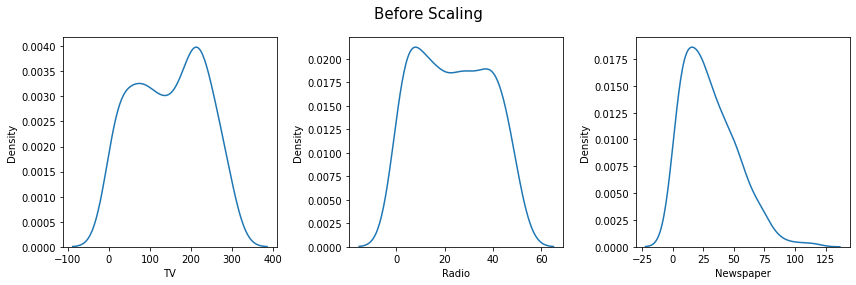

In [10]:
plt.figure(figsize=(12,4))
for i in range(len(columns)):
    plt.subplot(1,3,i+1)
    sns.kdeplot(x=data[columns[i]])
plt.suptitle("Before Scaling", fontsize=15)
plt.tight_layout()

In [11]:
pipeline = Pipeline([
    ("Standard scaler",StandardScaler()),
    ("Robust scaler", RobustScaler())
])

In [12]:
data[columns] = pipeline.fit_transform(data[columns])

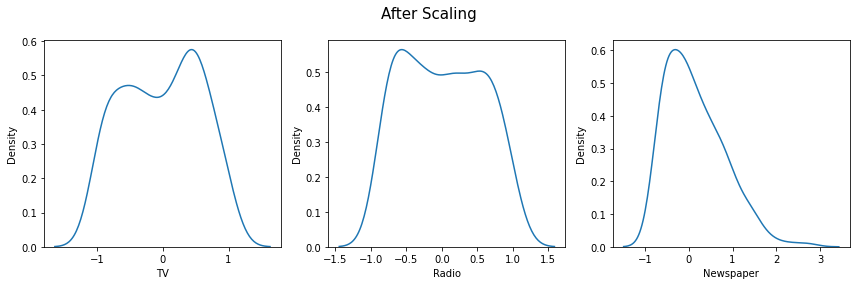

In [14]:
plt.figure(figsize=(12,4))
for i in range(len(columns)):
    plt.subplot(1,3,i+1)
    sns.kdeplot(x=data[columns[i]])
plt.suptitle("After Scaling", fontsize=15)
plt.tight_layout()

In [15]:
data.head(3)

,TV,Radio,Newspaper,Sales
0,0.556248,0.561205,1.343122,22.1
1,-0.728626,0.617702,0.598145,10.4
2,-0.917619,0.866290,1.346213,12.0


Data Splitting 

In [16]:
X = data.drop(columns=["Sales"])
y = data["Sales"]
X.shape, y.shape

((200, 3), (200,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Model Selection

- Model training

In [18]:
#Linear regresssion model
linear_model = LinearRegression().fit(X_train, y_train)

#Random forest model
rf_model = RandomForestRegressor().fit(X_train, y_train)

#Gradient boosting model
gb_model = GradientBoostingRegressor().fit(X_train, y_train)

- Making predictions

In [19]:
#Linear regresssion predictions
linear_preds = linear_model.predict(X_test)

#Random forest predictions
rf_preds = rf_model.predict(X_test)

#Gradient boosting predictions
gb_preds = gb_model.predict(X_test)

Model Evaluation 

In [20]:
def evaluate(model_name, y_preds, y_test=y_test):
    plt.figure(figsize=(10, 5))
    # Scatter plot of actual vs. predicted values
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_preds)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')

    # Residual plot : Plot the residuals (the differences between actual and predicted values) against the predicted values. This helps you identify patterns or trends in the errors.
    plt.subplot(1, 2, 2)
    residuals = y_test - y_preds
    plt.scatter(y_preds, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

    # Error Metrics
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)
    print(f"Model : {model_name}")
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

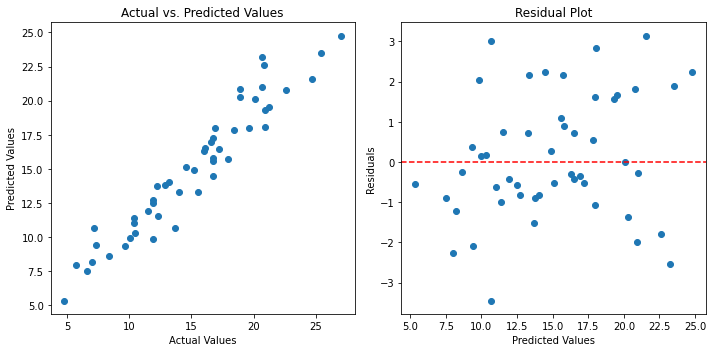

Model : Linear regression
Mean Squared Error (MSE): 2.35
Root Mean Squared Error (RMSE): 1.53
Mean Absolute Error (MAE): 1.25
R-squared (R2): 0.92


In [21]:
evaluate("Linear regression",linear_preds)

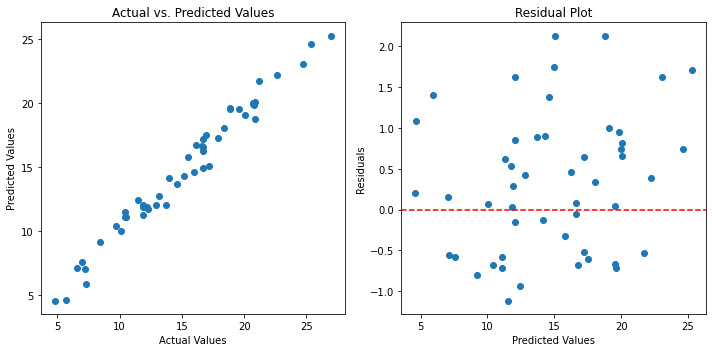

Model : random forest
Mean Squared Error (MSE): 0.82
Root Mean Squared Error (RMSE): 0.90
Mean Absolute Error (MAE): 0.74
R-squared (R2): 0.97


In [22]:
evaluate("random forest",rf_preds)

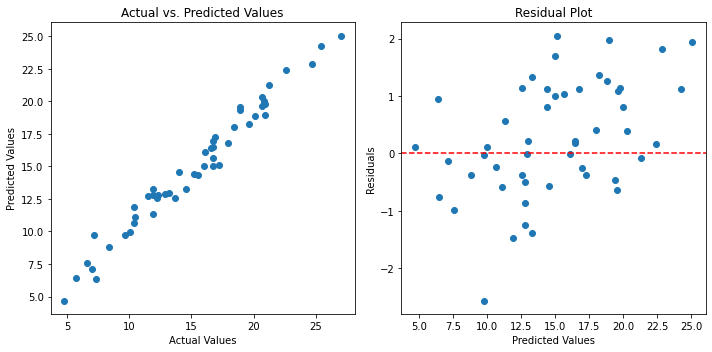

Model : gradient boosting
Mean Squared Error (MSE): 1.05
Root Mean Squared Error (RMSE): 1.03
Mean Absolute Error (MAE): 0.82
R-squared (R2): 0.96


In [23]:
evaluate("gradient boosting", gb_preds)

Conclusion 

- Random forest is giving the best results